import libraries

In [70]:
from ipywidgets import interact
from fastai.vision import *
from fastbook import *


matplotlib.rc('image', cmap='Greys')
plt.rc('figure', dpi=90)


In [71]:
def plot_function_stack(f, title=None, min=-4.1, max=4.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

Grab Dataset

In [72]:
mnist_path = untar_data(URLs.MNIST)

In [73]:
# re-visit
Path.BASE_PATH = mnist_path

In [74]:
mnist_path.ls()

(#2) [Path('training'),Path('testing')]

In [75]:
(mnist_path/'training').ls()

(#10) [Path('training/4'),Path('training/7'),Path('training/9'),Path('training/5'),Path('training/8'),Path('training/0'),Path('training/2'),Path('training/1'),Path('training/6'),Path('training/3')]

Assign Sets from path

In [76]:
nines = (mnist_path/'training'/'9').ls().sorted()
sixes = (mnist_path/'training'/'6').ls().sorted()

In [77]:
nines

(#5949) [Path('training/9/10003.png'),Path('training/9/10004.png'),Path('training/9/10023.png'),Path('training/9/10028.png'),Path('training/9/10038.png'),Path('training/9/10043.png'),Path('training/9/10047.png'),Path('training/9/1005.png'),Path('training/9/10055.png'),Path('training/9/10059.png')...]

Create Tensors from each image in path

In [78]:
im_9 = Image.open(nines[1])
im_9

In [79]:
im_9_tens = tensor(im_9)
im_9_tens[4:15, 4:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  33,  54, 151, 151, 194, 151, 151],
        [  0,   0,   0,  64, 237, 254, 254, 254, 254, 254, 254],
        [  0,   0,  12, 187, 255, 173, 114,  69,  10,  10,  10],
        [  0,  12, 182, 246,  99,   8,   0,   0,   0,   0,   0],
        [  0, 132, 254, 218,   0,   0,   0,   0,   0,   0,   0],
        [  0, 141, 254, 125,   0,   0,   0,   0,   0,   0,   0],
        [  0, 134, 254, 239, 151,  29,  12,   0,   0,   0,   0],
        [  0,  13, 185, 254, 254, 254, 233, 125, 167, 167, 167]], dtype=torch.uint8)

In [80]:
nines_tens = [tensor(Image.open(o)) for o in nines]
sixes_tens = [tensor(Image.open(o)) for o in sixes]

Stack the list of tensors

In [81]:
stacked_nines = torch.stack(nines_tens).float()/255
stacked_sixes = torch.stack(sixes_tens).float()/255
stacked_nines.shape, stacked_sixes.shape

(torch.Size([5949, 28, 28]), torch.Size([5918, 28, 28]))

Get the average of the stacks and assign

(<AxesSubplot: >, <AxesSubplot: >)

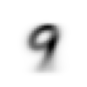

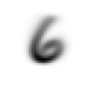

In [82]:
mean_stacked_nines = stacked_nines.mean(0)
mean_stacked_sixes = stacked_sixes.mean(0)
show_image(mean_stacked_nines), show_image(mean_stacked_sixes)

Assign arbitrary actual image

(<AxesSubplot: >, <AxesSubplot: >)

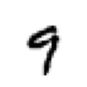

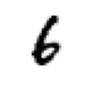

In [83]:
im_9 = stacked_nines[2]
im_6 = stacked_sixes[2]
show_image(im_9), show_image(im_6)

Assign to calculate distance from example to ideal
1. The mean absolute distance(L1 Norm)
1. The squareroot of the mean of the square of differences(root mean squared error, or L2 Norm)

In [84]:
dist_nines_abs = (im_9 - mean_stacked_nines).abs().mean()
dist_sixes_abs = (im_9 - mean_stacked_sixes).abs().mean()
dist_nines_mse = ((im_9 - mean_stacked_nines)**2).mean().sqrt()
dist_sixes_mse = ((im_9 - mean_stacked_sixes)**2).mean().sqrt()


In [85]:
dist_nines_abs, dist_nines_mse

(tensor(0.0990), tensor(0.1961))

In [86]:
dist_sixes_abs, dist_sixes_mse

(tensor(0.1462), tensor(0.2703))

Do the same as above with the pytorch library

Fastai automatically imports `torch.nn.functional` as `F`

In [87]:
dist_nines_abs = F.l1_loss(im_9.float(), mean_stacked_nines)
dist_nines_mse = F.mse_loss(im_9, mean_stacked_nines).sqrt()
dist_nines_abs, dist_nines_mse

(tensor(0.0990), tensor(0.1961))

In [88]:
dist_sixes_abs = F.l1_loss(im_9.float(), mean_stacked_sixes)
dist_sixes_mse = F.mse_loss(im_9, mean_stacked_sixes).sqrt()
dist_sixes_abs, dist_sixes_mse


(tensor(0.1462), tensor(0.2703))

*** 

Create tensors for the validation set of each

In [89]:
mnist_path.ls()

(#2) [Path('training'),Path('testing')]

In [90]:
valid_nines_tens = torch.stack([tensor(Image.open(o))
                                for o in (mnist_path/'testing'/'9').ls()])
valid_sixes_tens = torch.stack([tensor(Image.open(o))
                                for o in (mnist_path/'testing'/'6').ls()])
valid_nines_tens = valid_nines_tens.float()/255
valid_sixes_tens = valid_sixes_tens.float()/255
valid_nines_tens.shape, valid_sixes_tens.shape                                

(torch.Size([1009, 28, 28]), torch.Size([958, 28, 28]))

Define a function that returns mean absolute distance(L1 Norm)(-1,-2)

In [91]:
def mean_abs_dist(a, b): return (a - b).abs().mean((-1,-2))

***

#### **Test**

In [92]:
test_tensor = tensor(range(20))  
test_tensor = test_tensor.reshape(5,4)

In [93]:
test_tensor_stack = torch.stack([test_tensor*random.randrange(2, 10) for x in range(5)])
test_tensor_stack = test_tensor_stack.float()
test_tensor_stack

tensor([[[  0.,   4.,   8.,  12.],
         [ 16.,  20.,  24.,  28.],
         [ 32.,  36.,  40.,  44.],
         [ 48.,  52.,  56.,  60.],
         [ 64.,  68.,  72.,  76.]],

        [[  0.,   3.,   6.,   9.],
         [ 12.,  15.,  18.,  21.],
         [ 24.,  27.,  30.,  33.],
         [ 36.,  39.,  42.,  45.],
         [ 48.,  51.,  54.,  57.]],

        [[  0.,   3.,   6.,   9.],
         [ 12.,  15.,  18.,  21.],
         [ 24.,  27.,  30.,  33.],
         [ 36.,  39.,  42.,  45.],
         [ 48.,  51.,  54.,  57.]],

        [[  0.,   8.,  16.,  24.],
         [ 32.,  40.,  48.,  56.],
         [ 64.,  72.,  80.,  88.],
         [ 96., 104., 112., 120.],
         [128., 136., 144., 152.]],

        [[  0.,   2.,   4.,   6.],
         [  8.,  10.,  12.,  14.],
         [ 16.,  18.,  20.,  22.],
         [ 24.,  26.,  28.,  30.],
         [ 32.,  34.,  36.,  38.]]])

In [94]:
test_tensor_stack.shape

torch.Size([5, 5, 4])

In [95]:
test_tensor_stack.mean((-1 -2))

tensor([[ 0.,  4.,  8., 12.],
        [16., 20., 24., 28.],
        [32., 36., 40., 44.],
        [48., 52., 56., 60.],
        [64., 68., 72., 76.]])

In [96]:
test_tensor_stack.type

<function Tensor.type>

#### **End Test**

*** 

Pass sample image and mean image to function

In [97]:
mean_abs_dist(im_9, mean_stacked_nines)

tensor(0.0990)

Define a function that returns a boolean `True` value if a sample image is a 9

In [98]:
def is_9(x): return mean_abs_dist(x, mean_stacked_nines) < mean_abs_dist(x, mean_stacked_sixes) 

(<AxesSubplot: >, <AxesSubplot: >)

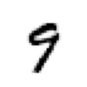

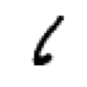

In [99]:
show_image(stacked_nines[5]), show_image(stacked_sixes[7])

In [100]:
is_9(stacked_nines[5]), is_9(stacked_sixes[7])

(tensor(True), tensor(False))

Assign the return value of the above as the mean of a float to calculate accuracy of 9's and 6's

In [101]:
accuracy_9s = is_9(stacked_nines).float().mean()
accuracy_6s = 1 - (is_9(stacked_sixes).float()).mean()
accuracy_6s, accuracy_9s

(tensor(0.9811), tensor(0.9939))

*** 

Create a simple quadratic function definition

In [102]:
def g(x): return x**2

Plot the function

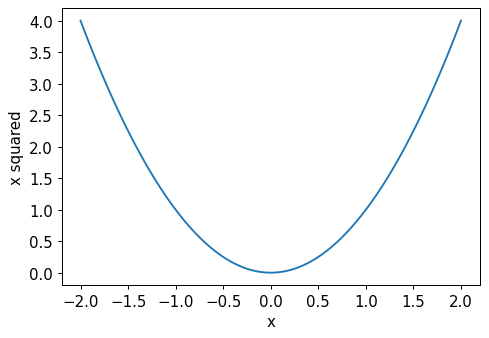

In [103]:
plot_function(g, 'x', 'x squared')

Scatter Plot the function

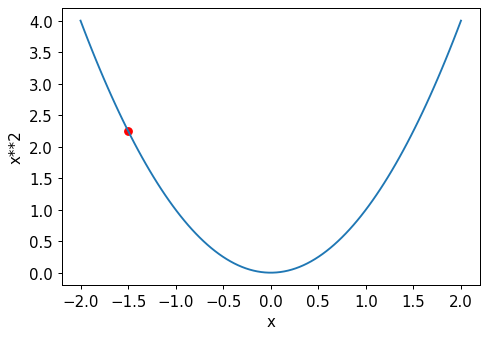

In [104]:
plot_function(g, 'x', 'x**2')
plt.scatter(-1.5, g(1.5), color="red")

*** 

Create a scalar tensor `xt` (float) and "tag" that we want to calculate gradients with respect to that variable

In [105]:
xt = tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

Calucate our function `yt` at funtion `xt`

In [106]:
yt = g(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

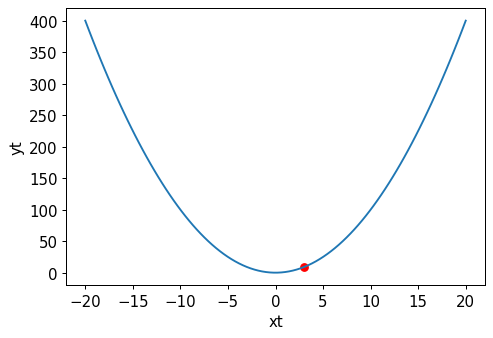

In [107]:
plot_function(g, 'xt', 'yt', min=-20, max=20)
plt.scatter(xt.detach().numpy(), g(xt).detach().numpy(), color='red')

Tell pytorch to calculate the gradients at `yt` for us

In [108]:
yt.backward()


In [109]:
xt.grad, yt

(tensor(6.), tensor(9., grad_fn=<PowBackward0>))

In [110]:
xtplot = xt.detach().numpy()
ytplot = yt.detach().numpy()
xtgradplot = xt.detach().numpy()

In [111]:
X, Y = np.meshgrid(xtplot, ytplot)
U = xtgradplot * -1
V = 0

In [112]:
def line(a, b, x):
    return a*x + b

def mk_line (a, b):
    return partial(line, a,b)

def deriv(x):
    return 2*x

@interact(x=(-4.0, 4.0, 0.01))
def plot_quad(x):
    
    # plot point
    plt.scatter(x, g(x), color='red');
    
    # plot tangent
    a = deriv(x)
    b = g(x) - a*x
    local_deriv = mk_line(a, b)
    plot_function_stack(local_deriv)
 
    # visualize the gradient
    # i.e. inverse derivative as the direction how we need to change x to reach the minimum
    start = [x, g(x)]
    direction_x = [deriv(x)*-1*10, 0]
    plt.quiver(start[0], start[1], direction_x[0], direction_x[1])
    
    # plot quadratic
    plot_function_stack(g)

interactive(children=(FloatSlider(value=0.0, description='x', max=4.0, min=-4.0, step=0.01), Output()), _dom_c…

View the gradients that were calculated

*** 

Repeat the above using the same name(`xt`), but create a vector

In [113]:
xt = tensor([3., 4., 7.]).requires_grad_()
xt

tensor([3., 4., 7.], requires_grad=True)

In [114]:
g   (xt)

tensor([ 9., 16., 49.], grad_fn=<PowBackward0>)

Add a `sum` to the above `f` function, so that it can take a vector and return a scalar

In [115]:
def f(x): return (x**2).sum()

Repeat backpropagation

In [116]:
yt = f(xt)
yt

tensor(74., grad_fn=<SumBackward0>)

In [117]:
yt.backward()
xt.grad

tensor([ 6.,  8., 14.])

*** 

*Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time*

Weights
```
w -= gradient(w) * lr
```

Create a vector tensor `time` as 20 float values

In [118]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

Create at vector tensor `speed` at 20 float values that would show a random quadratic distribution of points

Plot result

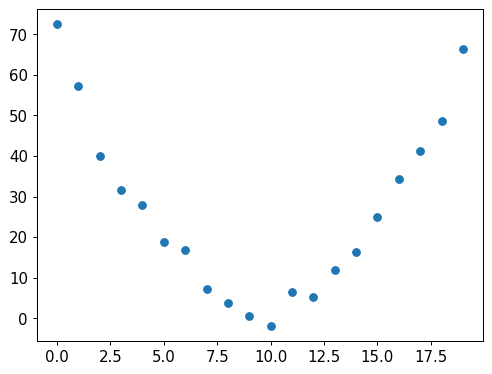

In [119]:
speed = torch.randn(20)*3 + .75*(time - 9.5)**2 + 1
plt.scatter(time, speed)

Define a quadratic function(`f`) that takes 2 arguments
- one for time
- one for parameters

`a*(time**2)+(b*time)+c`

In this function separate the input and the parameters in the return value

In [120]:
def f(t, params):
    a, b, c = params
    return a*(t**2)+ b*t + c

Define a function that calculates the means square error on predictions and targets

In [121]:
def mse(preds, targets):
    return ((preds - targets)**2).mean()

#### Step 1: Initialize the parameters

In [122]:
params = torch.randn(3).requires_grad_()
params

tensor([ 0.6863,  0.4679, -0.2049], requires_grad=True)

Also clone original params for graphs later

In [123]:
orig_params = torch.clone(params)
orig_params

tensor([ 0.6863,  0.4679, -0.2049], grad_fn=<CloneBackward0>)

#### Step 2: Calculate the predictions

In [124]:
preds = f(time, params)
preds

tensor([-2.0493e-01,  9.4929e-01,  3.4762e+00,  7.3757e+00,  1.2648e+01,  1.9293e+01,  2.7310e+01,  3.6700e+01,  4.7463e+01,  5.9598e+01,  7.3106e+01,  8.7987e+01,  1.0424e+02,  1.2187e+02,
         1.4086e+02,  1.6124e+02,  1.8298e+02,  2.0610e+02,  2.3059e+02,  2.5645e+02], grad_fn=<AddBackward0>)

Show predictions vs Targets

In [125]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-50,100)

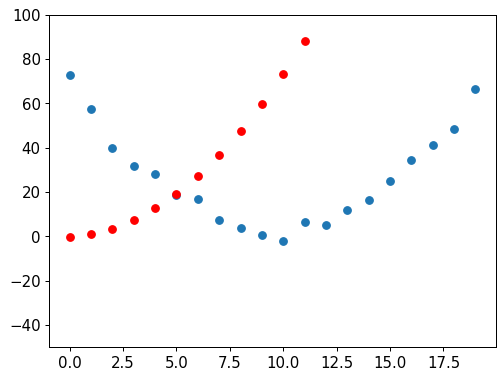

In [126]:
show_preds(preds)

#### Step 3: Calculate the loss

In [127]:
loss = mse(preds, speed)
loss

tensor(10187.9268, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [128]:
loss.backward()


In [129]:
params.grad

tensor([32728.7188,  2100.9204,   124.9925])

Pick a learning rate

In [130]:
lr = 1e-5
lr

1e-05

#### Step 5: Step the weights. 

Update parameters based on calculated gradients

In [131]:
params.data, params.grad.data

(tensor([ 0.6863,  0.4679, -0.2049]),
 tensor([32728.7188,  2100.9204,   124.9925]))

In [132]:
params.data -= params.grad.data * lr
params.grad = None


Check if loss has improved

In [133]:
preds = f(time, params)
mse(preds, speed)

tensor(2470.4714, grad_fn=<MeanBackward0>)

Create a function so that all the above can be applied several times

In [134]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    lr = 1e-5
    params.data -= params.grad.data * lr
    params.grad = None
    if prn: print(loss.item())
    return preds


#### Step 6: Repeat the process 

Iterate to repeat the process

In [135]:
for i in range(10): apply_step(params)   

2470.471435546875
1010.0901489257812
733.7384033203125
681.4413452148438
671.5423583984375
669.666259765625
669.3082885742188
669.2379150390625
669.2215576171875
669.2156372070312


In [136]:
params = orig_params.detach().requires_grad_()

#### Step 7: stop

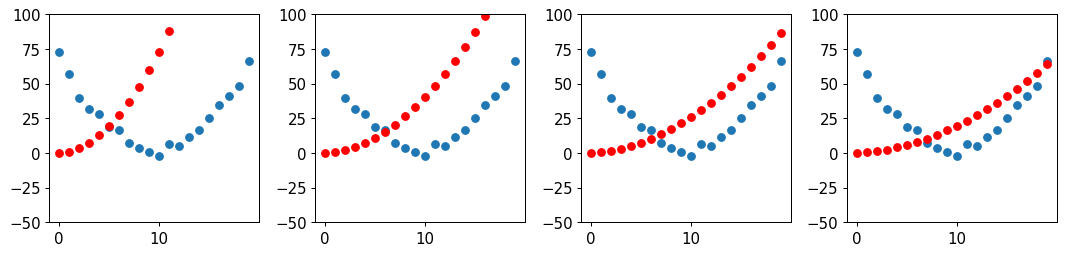

In [137]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

*** 

- `cat` concatonates tensors along a given dimension
- `view` reshapes the tensor without changing its contents  
- Passing `-1` will make axis as big as necessary to fit all the data, or that that dimension will be inferred from the other dimensions

In [141]:
train_x = torch.cat([stacked_nines, stacked_sixes]).view(-1, 28*28)
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [147]:
train_y = tensor([1]*len(nines) + [0]*len(sixes))
train_y, len(train_y)

(tensor([1, 1, 1,  ..., 0, 0, 0]), 11867)